In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os
import gc

In [1]:
directory = '/Users/azeez/Documents/Github_Projects/EventsToWords/smemi309-final-evaluation-challenge-2022'
from load_dataset import EventsToWords
dataset = EventsToWords(directory)

The length of the test set is 10
The keys to access path files for the training set are 10
	Ruisseau has 32 samples
	Ecole has 32 samples
	Pyjama has 32 samples
	Carnaval has 32 samples
	Joyeux has 32 samples
	Musique has 32 samples
	Decider has 32 samples
	Fillette has 32 samples
	Huitre has 32 samples
	Addition has 32 samples


In [2]:
training_set, training_targets, target_labels = dataset.train_samples, dataset.train_targets, dataset.train_text_labels

## Analysis of a Sample

##### The data stream produced by an event camera represent the asynchronous fireing of pixels across the sensor, as they experience luminosity change above a hardware defined threshold. The event camera sensor has extremly high temporal resolution (microseconds). If there is no movement or luminosity changes within the scene, no events are fired from a pixel. In contrast, when there is movement, many events fire within the region of pixels observing this movement. Below I plot a histogram that illustrates the number of events per timestamp. Since this sample corresponds to an individual speaking a word, most of the oral movement occurs in the middle of the recorded sample. As a result, we see a peak in events in the middle of the recorded sample as opposed to the beiging or end of the sample when the subjects mouth is more stationary. 

<function matplotlib.pyplot.show(close=None, block=None)>

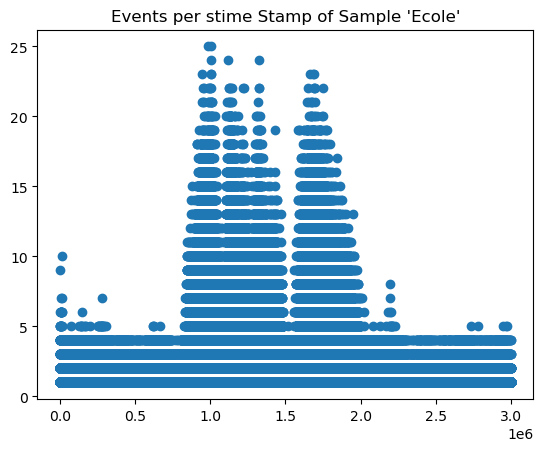

In [9]:
import matplotlib.pyplot as plt

train_set = dataset.train_set
test = train_set['Ecole'][8]

x_dim = test.x.max() + 1
y_dim = test.y.max() + 1

snapshot = test.loc[test.time == 700000]
scatter = test.groupby(by='time').count().reset_index(False)

plt.scatter(scatter.time, scatter.x)
plt.title("Events per stime Stamp of Sample 'Ecole'")
plt.show

## Binning the Samples
#### To make the samples easeir to process by a network, we bin the samples along the temporal as well as pixel dimension. 

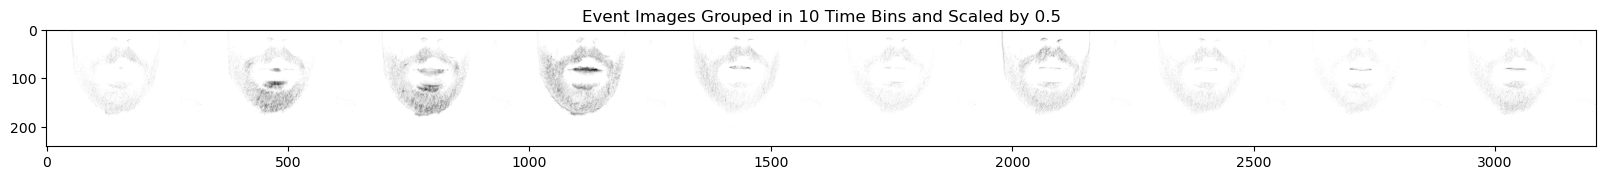

In [15]:
RESIZE_SCALE = 0.5
TIME_BINS = 10

def visualizeSample(sample, cmap ="binary"):
    plt.imshow(np.concatenate([l for l in sample], axis = 1), cmap = cmap)

test = train_set['Ecole'][0]
RESIZE_SCALE = 0.5
TIME_BINS = 10
ret = dataset.bin_sample(test, TIME_BINS, RESIZE_SCALE)

plt.rcParams["figure.figsize"] = (20,8)
plt.title(f'Event Images Grouped in {TIME_BINS} Time Bins and Scaled by {RESIZE_SCALE}')
visualizeSample(ret)